## Number Scan

In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [125]:
file_name ='../data/zip.train'
data = pd.read_csv(file_name, header=None, sep=" ")
data = data.drop(257, axis=1)


In [126]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [127]:
data = data.rename(columns={0:'number_id'})

In [128]:
data.head()

,number_id,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [129]:
data_id

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
number_id,,,,,,,,,,,,,,,,,,,,,
0.0,-0.998628,-0.995398,-0.984923,-0.941251,-0.833343,-0.571423,-0.131585,0.152608,0.046284,-0.353701,...,0.283028,0.528025,0.439052,0.042488,-0.467014,-0.825506,-0.967511,-0.996525,-0.999936,-1.000000
1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.999996,-0.987278,-0.635156,0.477248,-0.000297,-0.881669,...,-0.838979,0.150824,0.509270,-0.567522,-0.960094,-0.996263,-0.999337,-0.999532,-1.000000,-1.000000
2.0,-0.992488,-0.960391,-0.902576,-0.799346,-0.603462,-0.373672,-0.195773,-0.152778,-0.320365,-0.624383,...,-0.552854,-0.681235,-0.781535,-0.836428,-0.842494,-0.795569,-0.718192,-0.723185,-0.825242,-0.948852
3.0,-0.997515,-0.980442,-0.912538,-0.730590,-0.419023,-0.103135,0.159503,0.338296,0.346710,0.127670,...,0.349298,0.411213,0.302494,0.041719,-0.294737,-0.608787,-0.821020,-0.933365,-0.985812,-0.999822
4.0,-1.000000,-0.999086,-0.991456,-0.958089,-0.879319,-0.784402,-0.817144,-0.845865,-0.827502,-0.739293,...,-0.763633,-0.516819,-0.346865,-0.435334,-0.673342,-0.857403,-0.942275,-0.985347,-0.995462,-0.999474
5.0,-0.999459,-0.995099,-0.971671,-0.933806,-0.882126,-0.802403,-0.706063,-0.532728,-0.367802,-0.208058,...,0.113392,0.283272,0.287005,0.135662,-0.180800,-0.511856,-0.778504,-0.923410,-0.981669,-0.998282
6.0,-1.000000,-1.000000,-1.000000,-0.999090,-0.992752,-0.966196,-0.868203,-0.571102,-0.122383,-0.062833,...,0.326991,0.444535,0.236607,-0.195976,-0.619059,-0.857779,-0.968842,-0.995492,-0.999998,-1.000000
7.0,-0.974916,-0.879817,-0.763946,-0.603887,-0.417952,-0.296960,-0.237640,-0.204478,-0.142487,-0.085837,...,-0.353008,0.071310,-0.253135,-0.807352,-0.976025,-0.995406,-0.999184,-1.000000,-1.000000,-1.000000
8.0,-0.998502,-0.984430,-0.939161,-0.829727,-0.600395,-0.258779,0.100122,0.268923,0.213755,-0.062351,...,0.106795,0.582238,0.565945,0.078574,-0.537823,-0.856784,-0.970821,-0.995288,-0.999996,-1.000000


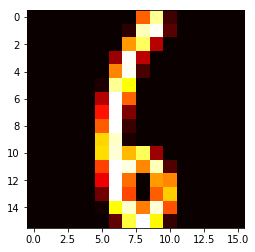

In [130]:
image = np.array(data.iloc[55,1:257]).reshape((16,16))
plt.imshow(image, cmap='hot',interpolation='none');

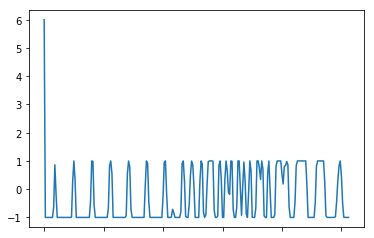

In [131]:
rows = data.iloc(0)
row.plot(kind='line')

## Clustering

In [132]:
data_no_id = data.drop('number_id', axis=1)

In [133]:
data_no_id.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [134]:
# object Instanziierung
kmeans = KMeans(n_clusters=10)
# Training
kmeans.fit(data_no_id)
# Vorhersage
data_no_id['cluster_nr_kmeans'] = kmeans.predict(data_no_id)

In [135]:
data_no_id.head()

,1,2,3,4,5,6,7,8,9,10,...,248,249,250,251,252,253,254,255,256,cluster_nr_kmeans
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,1
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,5
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,1


In [137]:
data_no_id['number_id']= data['number_id']

In [170]:
data_no_id

,1,2,3,4,5,6,7,8,9,10,...,249,250,251,252,253,254,255,256,cluster_nr_kmeans,number_id
0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6,6.0
1,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,1,5.0
2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,5,4.0
3,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7,7.0
4,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,1,3.0
5,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,-1.000,...,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0,5,6.0
6,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,-0.947,...,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1,3.0
7,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,-1.000,...,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,3,1.0
8,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,-1.000,...,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0,4,0.0
9,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,-0.899,...,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,3,1.0


In [157]:
data_cluster_id = data_no_id.iloc[:, 256:258]

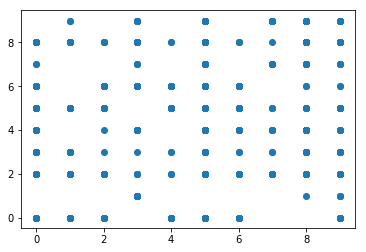

In [142]:
plt.scatter(data_no_id['cluster_nr_kmeans'], data_no_id['number_id']) #plot before clustering
plt.show();

In [158]:
data_cluster_id.head()

,cluster_nr_kmeans,number_id
0,6,6.0
1,1,5.0
2,5,4.0
3,7,7.0
4,1,3.0


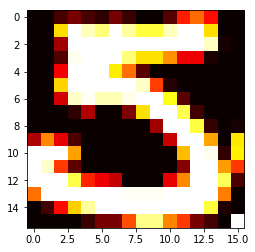

In [176]:
#cluster nr.1

#1 1 5 
#4 1 3
#6 1 3
#26 1 3

image = np.array(data_no_id.iloc[1,1:257]).reshape((16,16))
plt.imshow(image, cmap='hot',interpolation='none');


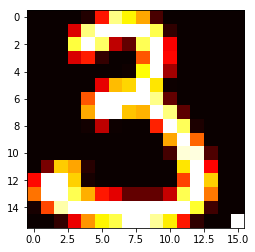

In [177]:
image = np.array(data_no_id.iloc[4,1:257]).reshape((16,16))
plt.imshow(image, cmap='hot',interpolation='none');

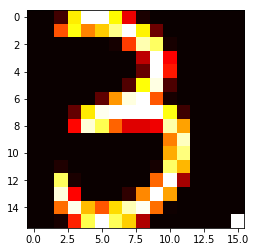

In [178]:
image = np.array(data_no_id.iloc[6,1:257]).reshape((16,16))
plt.imshow(image, cmap='hot',interpolation='none');

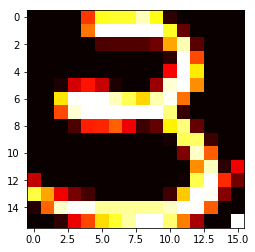

In [179]:
image = np.array(data_no_id.iloc[26,1:257]).reshape((16,16))
plt.imshow(image, cmap='hot',interpolation='none');

In [ ]:
#cluster 1 == number 3 !!

In [ ]:
#TO DO: GROUP BY CLUSTER AND AGG MEAN
#THAT´S THE REAL NUMBER THAT CLUSTER IDENTIFIES
#ASSIGN NUMBER TO CLUSTER
#REPLOT CLUSTER VS NUMBER_ID


#groupby('gender').agg({'amount':'count'}).plot()

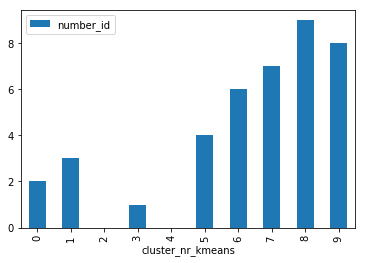

In [195]:
data_cluster_id.groupby('cluster_nr_kmeans').agg({'number_id':'median'}).plot(kind='bar')

In [194]:
data_cluster_id.groupby('cluster_nr_kmeans').agg({'number_id':'median'})

,number_id
cluster_nr_kmeans,
0,2.0
1,3.0
2,0.0
3,1.0
4,0.0
5,4.0
6,6.0
7,7.0
8,9.0


In [196]:
data_no_id['id_versus_cluster']= data_no_id['cluster_nr_kmeans']/data_no_id['number_id']

In [197]:
data_no_id.head()

,1,2,3,4,5,6,7,8,9,10,...,250,251,252,253,254,255,256,cluster_nr_kmeans,number_id,id_versus_cluster
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6,6.0,1.000000
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,1,5.0,0.200000
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,5,4.0,1.250000
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7,7.0,1.000000
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,1,3.0,0.333333


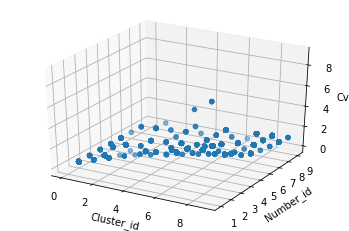

In [201]:
fig = plt.figure().gca(projection='3d')
fig.set_xlabel('Cluster_id')
fig.set_ylabel('Number_id')
fig.set_zlabel('CvsN')

fig_c = fig.scatter(data_no_id['cluster_nr_kmeans'], data_no_id['number_id'], data_no_id['id_versus_cluster'])

plt.show()

